In [1836]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
from sklearn.preprocessing import MinMaxScaler
tf.set_random_seed(1)
tf.reset_default_graph()

### Raw Data

In [1837]:
np.random.seed(7)
df = pd.read_csv('TSE.csv')
df.head()

,Time,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Volumn,MA5,MA10,DIF12_26,MACD9,OSC,K9,D9
0,2012/8/27,7504.45,7523.54,7457.75,7468.22,7490.86,7479.13,7395.94,7241.56,659.18,710.53,729.91,76.32,72.38,3.94,0.5732,0.6845
1,2012/8/28,7440.56,7445.08,7359.83,7361.94,7461.89,7467.40,7406.10,7249.34,736.45,700.44,722.05,65.42,70.99,-5.57,0.3861,0.5850
2,2012/8/29,7379.48,7405.30,7368.40,7391.15,7440.80,7459.74,7412.13,7255.86,641.73,702.66,711.24,56.67,68.12,-11.45,0.3166,0.4955
3,2012/8/30,7372.06,7404.94,7360.10,7371.44,7414.06,7447.87,7417.30,7261.11,744.06,713.92,706.17,48.21,64.14,-15.93,0.2330,0.4080
4,2012/8/31,7363.25,7406.52,7363.25,7397.06,7397.96,7440.78,7426.28,7266.39,626.43,681.57,690.22,42.15,59.74,-17.59,0.2256,0.3472


In [1838]:
df.shape

(1341, 17)

In [1839]:
df.describe()

,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Volumn,MA5,MA10,DIF12_26,MACD9,OSC,K9,D9
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,8938.595474,8972.232125,8898.568337,8935.375541,8929.946309,8923.074646,8909.388949,8857.201156,893.632543,892.762685,891.412707,18.722990,18.551775,0.171387,0.573809,0.573990
std,901.571704,902.345775,903.709416,903.073680,898.708442,893.494601,884.229647,863.480570,211.164926,178.787698,165.174669,70.788294,65.786940,22.892050,0.251206,0.219807
min,7116.800000,7134.780000,7050.050000,7088.490000,7119.830000,7159.970000,7175.800000,7241.560000,302.070000,439.910000,498.430000,-315.470000,-271.570000,-63.640000,0.048000,0.092100
25%,8250.310000,8295.410000,8214.620000,8257.320000,8242.120000,8240.090000,8240.850000,8232.630000,757.090000,775.270000,779.050000,-16.570000,-10.330000,-15.540000,0.366900,0.405700
50%,8902.940000,8936.570000,8867.780000,8899.900000,8904.730000,8889.880000,8879.160000,8825.150000,864.700000,865.540000,867.260000,36.150000,34.150000,-0.170000,0.604900,0.589700
75%,9499.220000,9522.990000,9453.490000,9495.840000,9463.570000,9461.690000,9434.310000,9360.160000,1001.450000,973.990000,966.700000,64.990000,61.960000,14.680000,0.802200,0.763300
max,11243.490000,11270.180000,11201.520000,11253.110000,11190.710000,11166.330000,11045.880000,10755.320000,2335.510000,1705.460000,1544.320000,164.330000,151.510000,77.510000,0.975700,0.946400


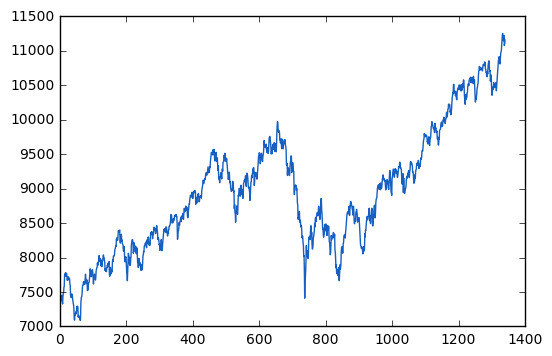

In [1840]:
close = df.Close.values
#close = close.reshape(len(df), 1)
#close = close.astype('float32')
plt.plot(close, c='#175FC0')

In [1841]:
X = pd.concat([df.Close], axis=1)
X.shape

(1341, 1)

In [1842]:
X.head()

,Close
0,7468.22
1,7361.94
2,7391.15
3,7371.44
4,7397.06


In [1843]:
data1 = X.values
data1.shape

(1341, 1)

In [1844]:
Y = df.Close.diff()
Y_ = pd.concat([Y, -Y], axis=1)
Y_.head()

,Close,Close
0,NaN,NaN
1,-106.28,106.28
2,29.21,-29.21
3,-19.71,19.71
4,25.62,-25.62


In [1845]:
Y_[Y_>0] = 0
Y_[Y_<0] = 1
Y_.head()

,Close,Close
0,NaN,NaN
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [1846]:
data2 = Y_.values
data2.shape

(1341, 2)

### Hyperparameter

In [1847]:
learning_rate = 0.001
#learning_rate = tf.train.exponential_decay(0.3, 1, 1, 0.99, staircase=True)
total_epoch = 500
look_back = 1
train_size = 0.8
n_step = look_back
n_input = X.shape[1]
n_output = 2
n_hidden1 = 8
n_hidden2 = 16
batch_size = 134
total_batch = int(len(y_data)//batch_size)

### Custom Function

In [1848]:
def create_timeseries(data1, data2, look_back=1):
    x_data = []
    for i in range(len(data1)-look_back):
        a = data1[i:(i+look_back), :]
        x_data.append(a) 
    for i in range(look_back):
        data2 = np.delete(data2, 0, axis=0)
    return np.array(x_data), np.array(data2)

In [1849]:
def layer(input_dim, output_dim, inputs, activation=None):
    #w_init = tf.variance_scaling_initializer(mode='fan_avg', distribution='uniform', scale=0.12)
    b_init = tf.constant_initializer(0.01)
    #w = tf.Variable(w_init([input_dim, output_dim]))
    w = tf.Variable(tf.random_normal([input_dim, output_dim], stddev=0.1) / np.sqrt(input_dim/2))
    b = tf.Variable(b_init([output_dim]))
    xwb = tf.add(tf.matmul(inputs, w), b)
    if activation is None:
        outputs = xwb
    else:
        outputs = activation(xwb)
    return outputs

### Training & Testing Sets

In [1850]:
x_data, y_data = create_timeseries(data1, data2, look_back)

In [1851]:
x_data.shape, y_data.shape

((1340, 1, 1), (1340, 2))

In [1852]:
x_data[0:5, :, :]

array([[[7468.22]],

       [[7361.94]],

       [[7391.15]],

       [[7371.44]],

       [[7397.06]]])

In [1853]:
y_data[0:5, :]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [1854]:
x_train = x_data[0:int(len(x_data)*train_size), :]
x_test = x_data[int(len(x_data)*train_size):len(x_data), :] 
y_train = y_data[0:int(len(y_data)*train_size), :]
y_test = y_data[int(len(y_data)*train_size):len(y_data), :] 

In [1855]:
x_train[0:5, :]

array([[[7468.22]],

       [[7361.94]],

       [[7391.15]],

       [[7371.44]],

       [[7397.06]]])

In [1856]:
y_train[0:5, :]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [1857]:
x_test[0:5, :]

array([[[9272.88]],

       [[9286.96]],

       [[9358.14]],

       [[9372.22]],

       [[9342.42]]])

In [1858]:
y_test[0:5, :]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [1859]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1072, 1, 1), (1072, 2), (268, 1, 1), (268, 2))

### Normalization

In [1860]:
x_train = x_train.reshape(-1, n_step*n_input)
x_test = x_test.reshape(-1, n_step*n_input)

In [1861]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1072, 1), (1072, 2), (268, 1), (268, 2))

In [1862]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

### Input Layer

In [1863]:
x = tf.placeholder('float', [None, n_step*n_input])

In [1864]:
x

<tf.Tensor 'Placeholder:0' shape=(?, 1) dtype=float32>

### Hidden Layer

In [1865]:
h1 = layer(n_step*n_input, n_hidden1, x, tf.nn.relu)
h1 = tf.nn.dropout(h1, keep_prob=0.8)
#h2 = layer(n_hidden1, n_hidden2, h1, tf.nn.relu)

In [1866]:
h1

<tf.Tensor 'dropout/mul:0' shape=(?, 8) dtype=float32>

### Output Layer

In [1867]:
y_pred = layer(n_hidden1, n_output, h1)

In [1868]:
y_pred

<tf.Tensor 'Add_1:0' shape=(?, 2) dtype=float32>

### Modeling

In [1869]:
y = tf.placeholder('float', [None, n_output])
loss_function = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=y))
#optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, momentum=0.0, epsilon=1e-10).minimize(loss_function)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, epsilon=1e-08).minimize(loss_function)

In [1870]:
correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, 'float'))

### Training

In [1871]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train_epoch = []; train_loss = []; train_acc = []; test_loss = []; test_acc = [];

In [1872]:
start = time()

for epoch in range(total_epoch):
    shuffle = np.random.permutation(len(y_train))
    x_train = x_train[shuffle]
    y_train = y_train[shuffle]
    for i in range(total_batch):
        k = i * batch_size
        batch_x = x_train[k : k+batch_size]
        batch_y = y_train[k : k+batch_size]
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    
    loss1, acc1 = sess.run([loss_function, accuracy], feed_dict={x: x_train, y: y_train})
    loss2, acc2 = sess.run([loss_function, accuracy], feed_dict={x: x_test, y: y_test})
    train_epoch.append(epoch); train_loss.append(loss1); train_acc.append(acc1);
    test_loss.append(loss2); test_acc.append(acc2);
    #print("Train Epoch=", '%02d' % (epoch+1), \
    #"Loss=", "{:.9f}".format(loss), \
    #"Accuracy=", acc)

pred_result = sess.run(tf.argmax(y_pred, 1), feed_dict={x: x_test})
true_result = sess.run(tf.argmax(y, 1), feed_dict={y: y_test})
print ('Pred Result=\n', pred_result)
print ('True Result=\n', true_result)

print ('Loss=', train_loss[-1])
print ('Accuracy=', train_acc[-1])

end = time()
print ('Run Time=', end-start)
    
sess.close()

Pred Result=
 [1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
True Result=
 [1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0

### Loss & Accuracy

/home/yangster/anaconda3/lib/python3.5/site-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


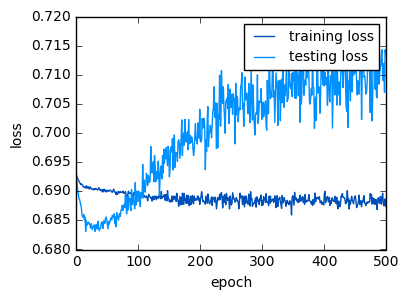

In [1873]:
%matplotlib inline
gcf = plt.gcf()
gcf.set_size_inches(4, 3)
plt.plot(train_epoch, train_loss, c='#0050BA', label='training loss')
plt.plot(train_epoch, test_loss, c='#0090FF', label='testing loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', prop={'size': 10})

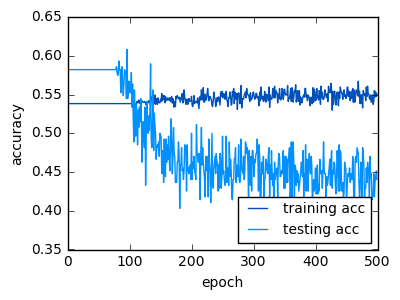

In [1874]:
%matplotlib inline
gcf = plt.gcf()
gcf.set_size_inches(4, 3)
plt.plot(train_epoch, train_acc, c='#0050BA', label='training acc')
plt.plot(train_epoch, test_acc, c='#0090FF', label='testing acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right', prop={'size': 10})

Accuracy should be greater than the following at least:

In [1875]:
len(y_train[np.argmax(y_train, 1)>0]) / len(y_train)

0.5382462686567164

In [1876]:
len(y_test[np.argmax(y_test, 1)>0]) / len(y_test)

0.582089552238806